In [1]:
using Printf
using Plots; gr()

Plots.GRBackend()

In [2]:
"Run a Cmd object, returning the stdout & stderr contents plus the exit code"
function execute(cmd::Cmd)
  out = Pipe()
  err = Pipe()

  process = run(pipeline(ignorestatus(cmd), stdout=out, stderr=err))
  close(out.in)
  close(err.in)

  (
    stdout = String(read(out)), 
    stderr = String(read(err)),  
    code = process.exitcode
  )
end

execute

In [3]:
function pingstats(machine::String, num::Int, verbose::String)
    out = Vector{Float64}(undef, num)
    
    for i in 1:num
        cmd = is_windows() ? `ping $machine -n 1` : `ping $machine -c 1 -s 64 -i 1`
        output, err, code = execute(`$cmd`)
        
        if occursin("time=", output)
            found = match(r"time=(\d+(?:\.\d+)?) ms", output)
            if found !== nothing
                time_ms = parse(Float64, found.captures[1])
                out[i] = time_ms
                if verbose != ""
                    @printf("Ping %d\n", i)
                end
            end
        end
    end
    
    return out
end

pingstats (generic function with 1 method)

In [4]:
function is_windows()
    return Sys.iswindows()
end


is_windows (generic function with 1 method)

In [8]:
# Example usage:
# stats = pingstats("isl.stanford.edu", 100, "v")
# or
# stats = pingstats("www.google.com", 100, "v")
stats = pingstats("www.thestar.ca", 1000, "");

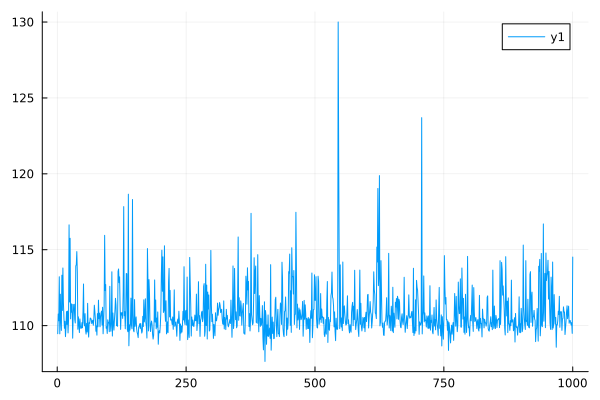

In [9]:
plot(stats)

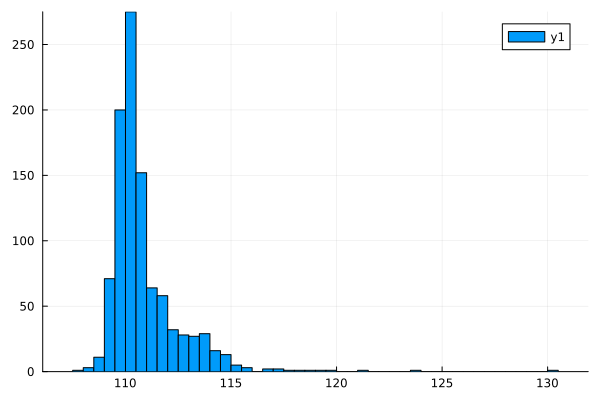

In [10]:
using StatsPlots
histogram(stats)

In [11]:
using Turing
using FillArrays
using StatsPlots

using LinearAlgebra
using Random
using Statistics

In [12]:
Random.seed!(12345)

TaskLocalRNG()

In [13]:
true_sin_freq = 2
true_sin_amp = 5
true_cos_freq = 7
true_cos_amp = 2.5
tmax = 10
β_true = 2
α_true = -1
tt = 0:0.05:tmax
f₁(t) = α_true + β_true * t
f₂(t) = true_sin_amp * sinpi(2 * t * true_sin_freq / tmax)
f₃(t) = true_cos_amp * cospi(2 * t * true_cos_freq / tmax)
f(t) = f₁(t) + f₂(t) + f₃(t)

f (generic function with 1 method)

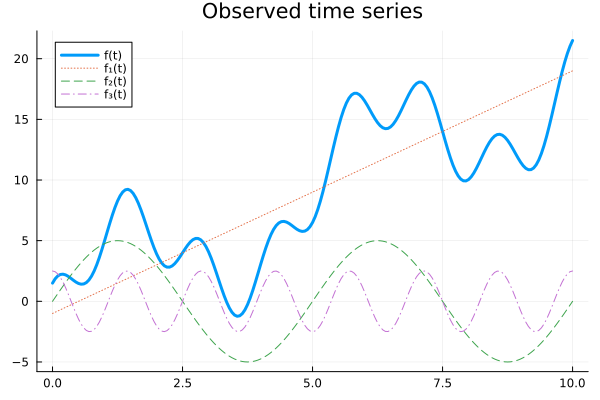

In [14]:
plot(f, tt; label="f(t)", title="Observed time series", legend=:topleft, linewidth=3)
plot!(
    [f₁, f₂, f₃],
    tt;
    label=["f₁(t)" "f₂(t)" "f₃(t)"],
    style=[:dot :dash :dashdot],
    linewidth=1,
)

# References

- [ ] [Collecting all output from shell commands](https://discourse.julialang.org/t/collecting-all-output-from-shell-commands/15592/2)
- [ ] [Review of the Mathematics of Logistic Regression via MLE](https://github.com/johnmyleswhite/julia_tutorials/blob/master/Statistics%20in%20Julia%20-%20Maximum%20Likelihood%20Estimation.ipynb)